# Looking into the outlying E values in the simulated data

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

simulated_fits = pd.read_csv("../Results/NOT_CONVERTED_simulated_E_B0.csv")
site_data = pd.read_pickle("../Data/NOT_CONVERTED_sites_species_Ea_B0_biomass.pkl")
fluxnet = pd.read_pickle("../Data/FitDataNightHH_pickled.pkl")
simulated_vals = pd.read_pickle("../Data/NOT_CONVERTED_NEE_simulation_vals.pkl")
site_fit_results = pd.read_csv("../Results/sites_boltz_fit_results.csv")

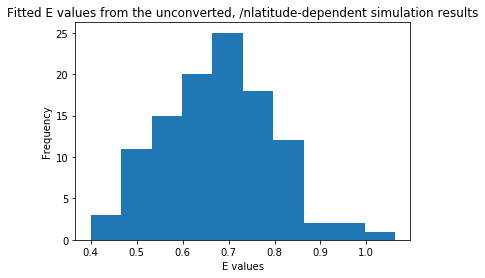

In [2]:
plt.hist(simulated_fits.E)
plt.xlabel("E values")
plt.ylabel("Frequency")
plt.title("Fitted E values from the unconverted, /nlatitude-dependent simulation results")
plt.show()

In [3]:
# Obvious outliers in the E > 1.0 region, so subset the
# data to focus on these outliers
outliers = simulated_fits[simulated_fits.E > 1]
outliers

E       lnB0      r_sq site_ID
47  1.062484  35.074247  0.999984   FIJok

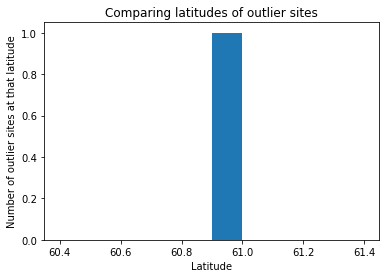

In [4]:
single_sites = fluxnet.groupby('siteID').first().reset_index()
vals = single_sites[single_sites.siteID.isin(list(outliers.site_ID))]
plt.hist(vals.lat)
plt.xlabel('Latitude')
plt.ylabel('Number of outlier sites at that latitude')
plt.title('Comparing latitudes of outlier sites')
plt.show()

In [5]:
biotraits = pd.read_csv("../Data/biotraits/NOT_CONVERTED_ID_Ea_B0.csv")
biotraits_50lat = biotraits[(biotraits.Latitude < 54) & (biotraits.Latitude > 49)].reset_index(drop=True)
biotraits_50lat

Unnamed: 0  FinalID                  Species        Ea       lnB0  \
0           22  MTD3344        Triticum aestivum  0.618216  30.043299   
1           23  MTD3345           Lolium perenne  0.362387  19.297830   
2           24  MTD3346                 Zea mays  0.859450  39.473542   
3           36  MTD3577      Plantago lanceolata  0.442658  23.489671   
4           37  MTD3578      Plantago lanceolata  0.569528  29.305069   
5           39  MTD3581      Plantago lanceolata  0.698523  34.179799   
6           41  MTD3583      Plantago lanceolata  0.364497  20.717279   
7           42  MTD3584      Plantago lanceolata  0.846639  40.505853   
8           43  MTD3585      Plantago lanceolata  0.294792  17.929513   
9           44  MTD3586      Plantago lanceolata  0.368315  20.360972   
10          45  MTD3587      Plantago lanceolata  0.954432  45.166428   
11          46  MTD3588      Plantago lanceolata  0.845640  40.327365   
12          47  MTD3589      Plantago lanceolata  1.275414  58.070982   
13          63  MTD3651          Empetrum nigrum  0.797564  33.000214   
14          64  MTD3652  Saxifraga oppositifolia  0.851177  35.188862   
15          90  MTD4160          Pinus banksiana  0.601925  27.993713   

     Latitude   Longitude  Biomass  
0   51.969187    5.665395      NaN  
1   51.969187    5.665395      NaN  
2   51.969187    5.665395      NaN  
3   52.613969    0.886402      NaN  
4   52.613969    0.886402      NaN  
5   52.613969    0.886402      NaN  
6   52.613969    0.886402      NaN  
7   52.613969    0.886402      NaN  
8   52.613969    0.886402      NaN  
9   52.613969    0.886402      NaN  
10  52.613969    0.886402      NaN  
11  52.613969    0.886402      NaN  
12  52.613969    0.886402      NaN  
13  53.349805   -6.260310      NaN  
14  53.349805   -6.260310      NaN  
15  53.120000 -106.070000      NaN

## Scatter plots of the fluxnet data's temperature vs. NEE values in the outlier sites

The non-blue plots show non-outlier plots (with E = 0.69 and E = 0.66) in order to have a comparison for the other plots

In [6]:
## NOTE: the non-blue plots are non-outlier plots that are being used to compare 
## with the outlier data

# Making scatter plots of two non-outlier simulations (with E = 0.69 and E = 0.66)
# with the fluxnet data in green or purple, and adding the simulated data overlaid in red 
fig = plt.figure(figsize=(20, 33)) 
temps = fluxnet.TA_F_inKelvin[fluxnet.siteID == "ARSLu"]
NEE = np.log(fluxnet.NEE_VUT_REF[fluxnet.siteID == "ARSLu"])
plt.subplot(5,4,1) 
plt.scatter(temps, NEE, color = 'green')

temps = fluxnet.TA_F_inKelvin[fluxnet.siteID == "AUCpr"]
NEE = np.log(fluxnet.NEE_VUT_REF[fluxnet.siteID == "AUCpr"])
plt.subplot(5,4,2) 
plt.scatter(temps, NEE, color = 'purple')

temps = pd.Series.unique(fluxnet.TA_F_inKelvin[fluxnet.siteID == "ARSLu"])
NEE = np.array(simulated_vals["ARSLu"])
plt.subplot(5,4,1) 
plt.scatter(temps, NEE, color = 'red')
plt.axis([270, 315, -15, 3])
plt.xlabel("Temperature (in Kelvin)")
plt.ylabel("ln(NEE) in umol/m^2")
plt.title("NEE values at site ARSLu\nE = 0.69")

temps = pd.Series.unique(fluxnet.TA_F_inKelvin[fluxnet.siteID == "AUCpr"])
NEE = np.array(simulated_vals["AUCpr"])
plt.subplot(5,4,2) 
plt.scatter(temps, NEE, color = 'red')
plt.axis([270, 315, -15, 3])
plt.xlabel("Temperature (in Kelvin)")
plt.ylabel("ln(NEE) in umol/m^2")
plt.title("NEE values at site AUCpr\nE = 0.65")

# extracting only the fluxnet data for the outlier sites
fluxnet_outliers = fluxnet[fluxnet.siteID.isin(outliers.site_ID)]

# Making similar scatter plots for the outlier data (with fitted E > 1.0)
# and again, overlaying the simulated data in orange.
i = 3

for site in sites:
    temps = fluxnet_outliers.TA_F_inKelvin[fluxnet_outliers.siteID == site]
    NEE = np.log(fluxnet_outliers.NEE_VUT_REF[fluxnet_outliers.siteID == site])
    plt.subplot(5,4,i) 
    plt.scatter(temps, NEE)
    i = i + 1
    
i = 3

for site in sites:
    temps = pd.Series.unique(fluxnet_outliers.TA_F_inKelvin[fluxnet_outliers.siteID == site])
    NEE = np.array(simulated_vals[site])
    plt.subplot(5,4,i) 
    plt.scatter(temps, NEE)
    plt.axis([270, 315, -15, 3])
    plt.xlabel("Temperature (in Kelvin)")
    plt.ylabel("ln(NEE) in umol/m^2")
    plt.title("NEE values at site " + str(site) + "\nE = " + str(round(np.array(outliers.E[outliers.site_ID == site])[0], 2)))
    i = i + 1
plt.show()


NameError: name 'sites' is not defined

## Looking at the species compositions at each of the sites 

In [ ]:
for site in sites:
    print(str(site) + ": \n")
    vals = pd.DataFrame({"Species": site_data.loc[site].Species, "Ea": site_data.loc[site].Ea, "Adjusted Biomass": site_data.loc[site].Biomass})
    print(str(vals) + "\n--------------------------------------")